# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [17]:
#worked with Chad Pickering, Nivi Achanta, and Ricky Safran
import os
import pandas as pd
import numpy as np
import glob
import sys
#print(sys.version)

In [44]:
doc_root = os.path.join(os.environ['HOME'],'Downloads/assignment3_data')
# os.listdir list hidden files. Also need to make sure we read only Excel files. 

def dataframe_from_dir(curtype):
    files_xls = glob.glob(os.path.join(doc_root, curtype, '*.xlsx'))
    df = pd.DataFrame()
    for f in files_xls:
        food = os.path.splitext(os.path.basename(f))[0] #get path name for each value entering loop
        if not food.startswith('~'):
            data = pd.read_excel(f, header = 1).dropna() #drop na values
            fresh_row_index = data.iloc[:,0].str.startswith('Fresh')    
            fresh_data = data[fresh_row_index].rename(columns = {'Unnamed: 2':'food', 'Unnamed: 5': 'type'}) #Find value that starts with fresh
            fresh_data['food'] = food
            fresh_data['type'] = curtype  
            df = df.append(fresh_data) 
    #drop unnecessary columns
    df = df.drop('Unnamed: 7', 1); df = df.drop('Unnamed: 8', 1)
    #rename columns to match example
    df.columns = ['avg price per cup', 'avg price per pound', 'form', 'yield', 'pounds per cup', 'food', 'type']
    return df

fruit = dataframe_from_dir('fruit')
print fruit

  avg price per cup avg price per pound     form yield pounds per cup  \
1          0.422373             1.56752   Fresh1   0.9       0.242508   
1            1.1891             3.04007   Fresh1  0.93       0.363763   
1          0.292965            0.566983   Fresh1  0.64       0.330693   
1           1.92292             5.77471  Fresh1   0.96        0.31967   
1           1.59318             4.73462   Fresh1  0.95        0.31967   
1            0.3938            0.535874   Fresh1  0.51       0.374786   
1           1.33455             3.59299   Fresh1  0.92       0.341717   
1          0.848278            0.897802   Fresh1  0.49       0.462971   
1          0.721266             2.09383   Fresh1  0.96       0.330693   
1          0.649077            0.796656   Fresh1  0.46       0.374786   
1           1.03797             2.04468   Fresh1  0.76       0.385809   
1          0.705783             1.37756   Fresh1  0.71       0.363763   
1          0.618667             1.76115   Fresh1  0

__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [45]:
#use dataframe_from_dir function to extract info from vegetables 
vegetables = dataframe_from_dir('vegetables')
print vegetables
#tomatoes aren't here because if you inspect the file, the fresh row is not formatted correctly

  avg price per cup  avg price per pound                        form  \
1           1.15536             1.172248                      Fresh1   
1           2.27497             2.213050                      Fresh1   
1           2.58227             3.213494                      Fresh1   
1          0.964886             2.235874                      Fresh1   
1          0.890898             2.763553                      Fresh1   
1          0.787893             1.244737                      Fresh1   
1          0.245944             0.579208        Fresh green cabbage1   
2          0.448412             1.056450          Fresh red cabbage1   
1          0.650001             2.630838                      Fresh1   
1            1.8125             2.690623                      Fresh1   
1          0.353448             1.295931  Fresh, consumed with peel1   
2           0.46965             1.295931              Fresh, peeled1   
1          0.696606             2.139972                      Fr

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [47]:
#make sure fruit numbers are numeric
fruit[['avg price per cup','avg price per pound', 'yield', 'pounds per cup']] = fruit[['avg price per cup','avg price per pound', 'yield', 'pounds per cup']].apply(pd.to_numeric)
#make sure vegetables numbers are numeric
vegetables[['avg price per cup','avg price per pound', 'yield', 'pounds per cup']] = vegetables[['avg price per cup','avg price per pound', 'yield', 'pounds per cup']].apply(pd.to_numeric)
#combine both data frames
df = fruit.append(vegetables)
print df

   avg price per cup  avg price per pound                        form  \
1           0.422373             1.567515                      Fresh1   
1           1.189102             3.040072                      Fresh1   
1           0.292965             0.566983                      Fresh1   
1           1.922919             5.774708                     Fresh1    
1           1.593177             4.734622                      Fresh1   
1           0.393800             0.535874                      Fresh1   
1           1.334548             3.592990                      Fresh1   
1           0.848278             0.897802                      Fresh1   
1           0.721266             2.093827                      Fresh1   
1           0.649077             0.796656                      Fresh1   
1           1.037970             2.044683                      Fresh1   
1           0.705783             1.377563                      Fresh1   
1           0.618667             1.761148          

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

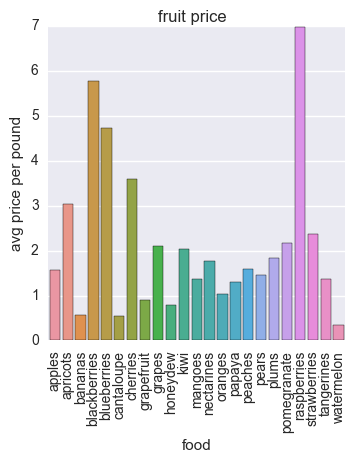

In [56]:
#1) Compare "avg price per pound" for fruits 
exp = sns.factorplot("food", "avg price per pound", data = fruit, kind = "bar") 
exp.set_xticklabels(rotation=90) #rotation so there's no overlap
exp.fig.suptitle('fruit price')
plt.show(exp)

Raspberries are the most expensive per pound and watermelon seems to be the least expensive.

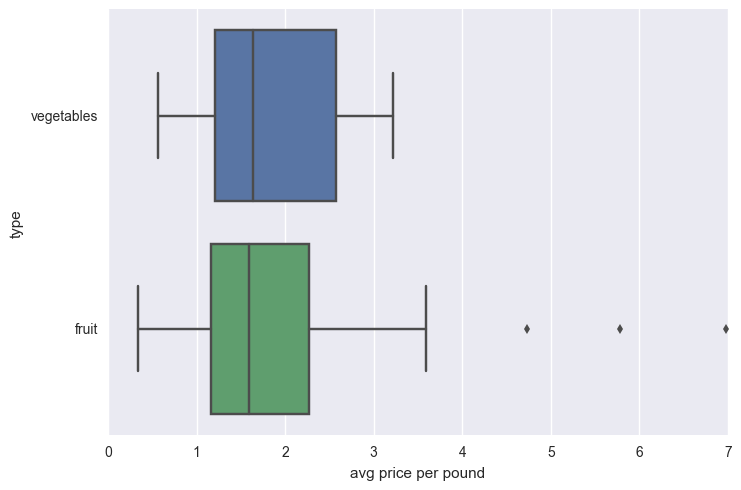

In [58]:
#2) Compare the distribution of prices for fruits and veggies 
dist=sns.boxplot("avg price per pound", "type", data = df)
plt.show(dist)

It seems that fruit prices have a wider range in price than vegetables and have more outliers. 
Both distributions are left skewed but the vegetable distribution is more left skewed than the fruit one. 

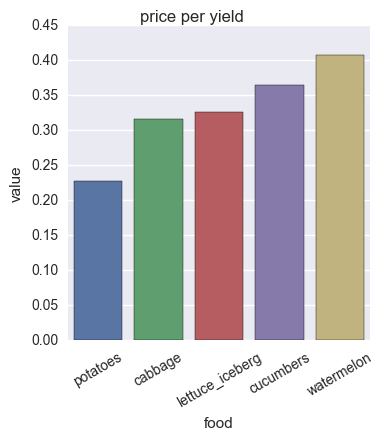

In [59]:
#3) find best value for price
#use price per cup and pound per cup to get a measure for best value by dividing the two to get pound price

df['value'] = df['avg price per cup']/df['yield']
df=df.sort_values(by = "value", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') 
#ascending = true gives us most value
values=df[:5:]
value_plot=sns.factorplot("food", "value", data = values, kind = "bar") 
value_plot.set_xticklabels(rotation=30) #rotation for no overlap
value_plot.fig.suptitle('price per yield')
plt.show(value_plot)

Watermelon appears to have the most value.

4) something surprising:
I was surprised by how much variation there is with pricing in fruits, especially the outliers, which happen to mostly be in the "berry" family: i.e: raspberries, blueberries, and blackberries.

5) Which foods provide the best combination of price, yield, and nutrition?
From looking at my last graph, most of the food that provides the best value for price is also quite low in nutrition, except cucumber. So, I think that one is the best pick for all 3. Otherwise, I would need to have access to data that provides nutrition info and cross reference this with my new "value" column. 